* 참고: https://blog.naver.com/justarose/222880394063

In [1]:
# 패키지 불러오기
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 통신사 데이터 불러오기
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플\파이널프로젝트 데이터/202211_202301_통신정보(쇼핑전처리).xlsx'
df = pd.read_excel(excelFile, usecols = 'A:L')
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%"
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00


In [3]:
df.columns

Index(['행정동코드', '자치구', '행정동', '성별', '연령대', '총인구수', '1인가구수',
       '쇼핑 서비스 사용 미추정 인구수', '쇼핑 서비스 사용일수', '쇼핑 서비스 사용일수: 4분위수, 25%',
       '쇼핑 서비스 사용일수: 4분위수, 50%', '쇼핑 서비스 사용일수: 4분위수, 75%'],
      dtype='object')

In [4]:
drop_col = ['행정동코드', '자치구', '행정동','쇼핑 서비스 사용일수: 4분위수, 25%',
       '쇼핑 서비스 사용일수: 4분위수, 50%', '쇼핑 서비스 사용일수: 4분위수, 75%']
new_df = df.drop(drop_col, axis = 1)
new_df.head()

,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수
0,2,25,586.00,319.71,0.00,141.43
1,2,50,51.00,23.31,18.31,102.00
2,1,25,740.00,355.32,52.86,127.95
3,2,75,152.00,61.90,82.61,34.21
4,1,70,108.59,48.88,55.50,34.17


In [5]:
# 군집분석(K-means)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(new_df)

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

## 1. 연령대와 쇼핑 서비스 사용일수 간의 군집분석

In [6]:
y_pred = kmeans.fit_predict(df[['연령대', '쇼핑 서비스 사용일수']])
y_pred

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 1, 1, 1])

In [7]:
df['cluster'] = y_pred
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%",cluster
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33,2
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33,2
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67,2
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00,1
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00,1


In [8]:
kmeans.cluster_centers_

array([[ 35.94548328, 183.09133   ],
       [ 67.39835003,  50.22823217],
       [ 39.57286432, 120.16711558]])

### 스케일링 진행

In [9]:
scaler = MinMaxScaler()

scaler.fit(df[['쇼핑 서비스 사용일수']])
df['day_scaled'] = scaler.transform(df[['쇼핑 서비스 사용일수']])

scaler.fit(df[['연령대']])
df['year_scaled'] = scaler.transform(df[['연령대']])

In [10]:
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%",cluster,day_scaled,year_scaled
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33,2,0.416824,0.090909
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33,2,0.292690,0.545455
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67,2,0.374386,0.090909
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00,1,0.079272,1.000000
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00,1,0.079146,0.909091


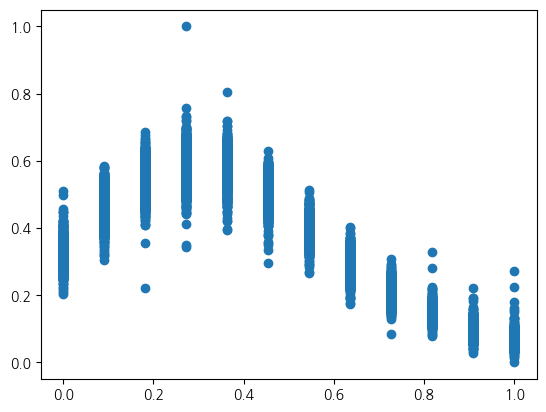

In [11]:
plt.scatter(df.year_scaled, df.day_scaled)

In [12]:
# 군집분석(K-means)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
y_pred = kmeans.fit_predict(df[['year_scaled', 'day_scaled']])
y_pred

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, ..., 1, 1, 1])

In [13]:
df['cluster'] = y_pred
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%",cluster,day_scaled,year_scaled
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33,2,0.416824,0.090909
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33,0,0.292690,0.545455
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67,2,0.374386,0.090909
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00,1,0.079272,1.000000
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00,1,0.079146,0.909091


In [14]:
kmeans.cluster_centers_

array([[0.40977293, 0.51544518],
       [0.81856857, 0.16258898],
       [0.09105192, 0.44202203]])

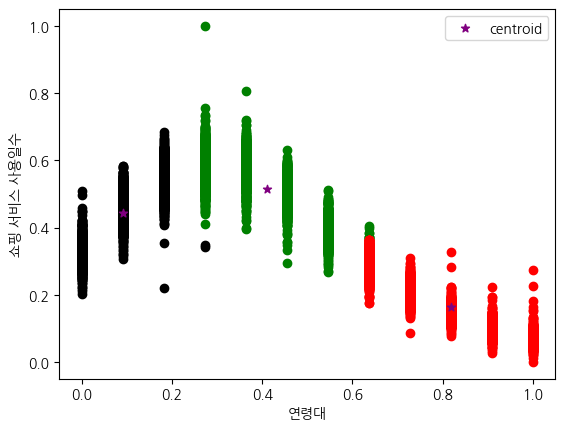

In [15]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.year_scaled, df1.day_scaled, color = 'green')
plt.scatter(df2.year_scaled, df2.day_scaled, color = 'red')
plt.scatter(df3.year_scaled, df3.day_scaled, color = 'black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')
plt.xlabel('연령대')
plt.ylabel('쇼핑 서비스 사용일수')
plt.legend()

### Elbow Plot

In [16]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df[['year_scaled', 'day_scaled']])
    sse.append(kmeans.inertia_)

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\

In [17]:
sse

[1347.9257613493803,
 356.7996896657351,
 201.87738442514714,
 110.6032652563267,
 72.77816301414097,
 52.26778475242531,
 40.914884763780705,
 32.8115570239737,
 26.987799346294018]

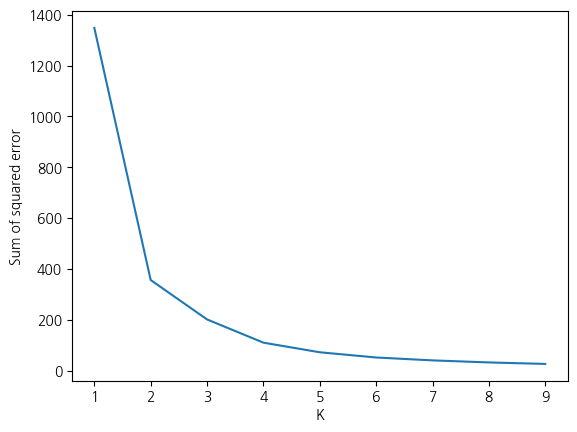

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

## 2. 성별과 쇼핑 서비스 사용일수 간의 군집분석

### 스케일링 진행

In [19]:
scaler = MinMaxScaler()
# 성별컬럼만 별도로 스케일링 진행
scaler.fit(df[['성별']])
df['sex_scaled'] = scaler.transform(df[['성별']])
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%",cluster,day_scaled,year_scaled,sex_scaled
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33,2,0.416824,0.090909,1.0
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33,0,0.292690,0.545455,1.0
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67,2,0.374386,0.090909,0.0
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00,1,0.079272,1.000000,1.0
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00,1,0.079146,0.909091,0.0


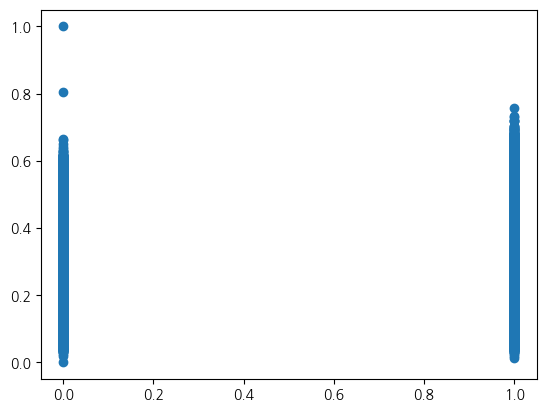

In [20]:
plt.scatter(df.sex_scaled, df.day_scaled)

In [21]:
# 군집분석(K-means)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
y_pred = kmeans.fit_predict(df[['sex_scaled', 'day_scaled']])
y_pred

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, ..., 0, 2, 2])

In [22]:
df['cluster'] = y_pred
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%",cluster,day_scaled,year_scaled,sex_scaled
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33,1,0.416824,0.090909,1.0
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33,2,0.292690,0.545455,1.0
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67,0,0.374386,0.090909,0.0
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00,2,0.079272,1.000000,1.0
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00,0,0.079146,0.909091,0.0


In [23]:
kmeans.cluster_centers_

array([[0.        , 0.33080351],
       [1.        , 0.53882187],
       [1.        , 0.19397688]])

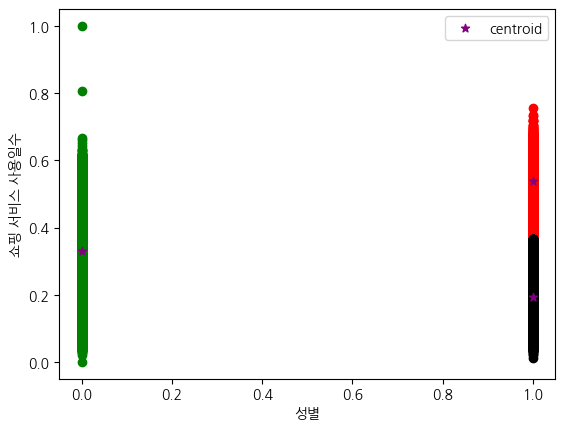

In [24]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.sex_scaled, df1.day_scaled, color = 'green')
plt.scatter(df2.sex_scaled, df2.day_scaled, color = 'red')
plt.scatter(df3.sex_scaled, df3.day_scaled, color = 'black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')
plt.xlabel('성별')
plt.ylabel('쇼핑 서비스 사용일수')
plt.legend()

### Elbow Plot

In [25]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df[['sex_scaled', 'day_scaled']])
    sse.append(kmeans.inertia_)

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\

In [26]:
sse

[2889.7439431675625,
 341.850626203937,
 190.6480345762955,
 74.37646801744084,
 48.20656654193305,
 29.406162676082985,
 23.21353100653888,
 17.898024856365698,
 14.23938619183617]

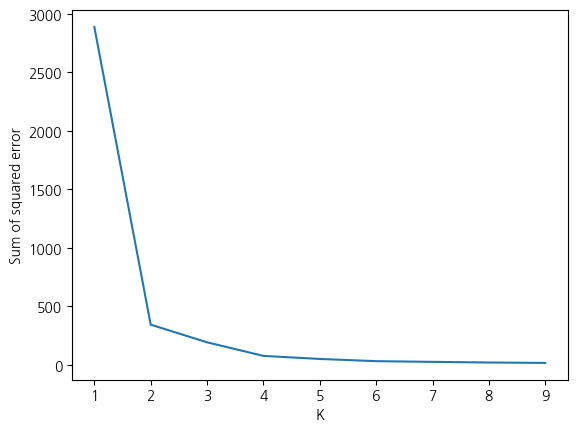

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

## 3. 1인가구수와 쇼핑 서비스 사용일수 간의 군집분석

In [28]:
scaler = MinMaxScaler()
# 1인가구수 컬럼만 별도로 스케일링 진행
scaler.fit(df[['1인가구수']])
df['one_scaled'] = scaler.transform(df[['1인가구수']])
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%",cluster,day_scaled,year_scaled,sex_scaled,one_scaled
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33,1,0.416824,0.090909,1.0,0.107603
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33,2,0.292690,0.545455,1.0,0.005983
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67,0,0.374386,0.090909,0.0,0.119812
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00,2,0.079272,1.000000,1.0,0.019213
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00,0,0.079146,0.909091,0.0,0.014749


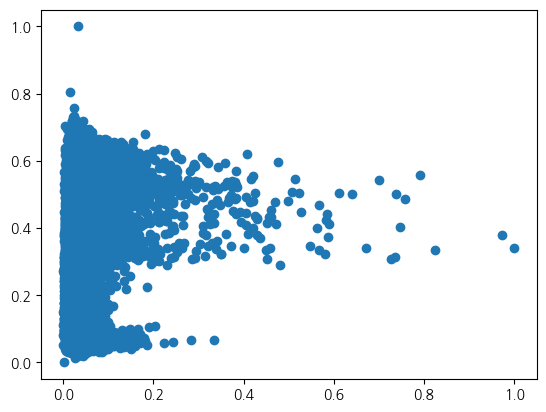

In [29]:
plt.scatter(df.one_scaled, df.day_scaled)

In [30]:
# 군집분석(K-means)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
y_pred = kmeans.fit_predict(df[['one_scaled', 'day_scaled']])
y_pred

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 0, 0, 0])

In [31]:
df['cluster'] = y_pred
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%",cluster,day_scaled,year_scaled,sex_scaled,one_scaled
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33,2,0.416824,0.090909,1.0,0.107603
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33,2,0.292690,0.545455,1.0,0.005983
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67,2,0.374386,0.090909,0.0,0.119812
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00,0,0.079272,1.000000,1.0,0.019213
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00,0,0.079146,0.909091,0.0,0.014749


In [32]:
kmeans.cluster_centers_

array([[0.03620897, 0.12697981],
       [0.06433105, 0.54665152],
       [0.04657842, 0.3457854 ]])

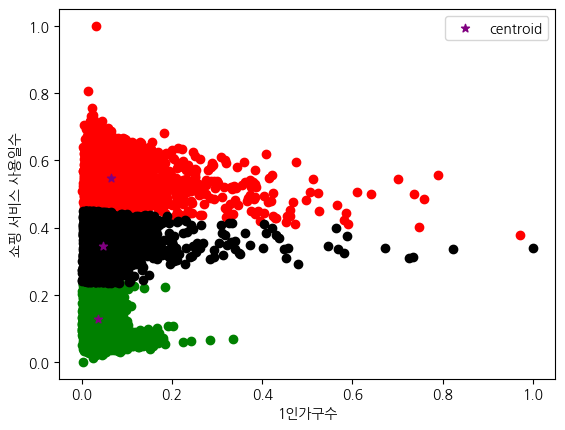

In [33]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.one_scaled, df1.day_scaled, color = 'green')
plt.scatter(df2.one_scaled, df2.day_scaled, color = 'red')
plt.scatter(df3.one_scaled, df3.day_scaled, color = 'black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')
plt.xlabel('1인가구수')
plt.ylabel('쇼핑 서비스 사용일수')
plt.legend()

### Elbow Plot

In [34]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df[['one_scaled', 'day_scaled']])
    sse.append(kmeans.inertia_)

D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pythonEx\lib\site-packages\sklearn\

In [35]:
sse

[381.1030224867094,
 113.1412408602233,
 66.09812058695452,
 48.577974227638315,
 36.89653364066522,
 30.49280753868815,
 25.419437702017827,
 21.274174385114485,
 19.338607766745355]

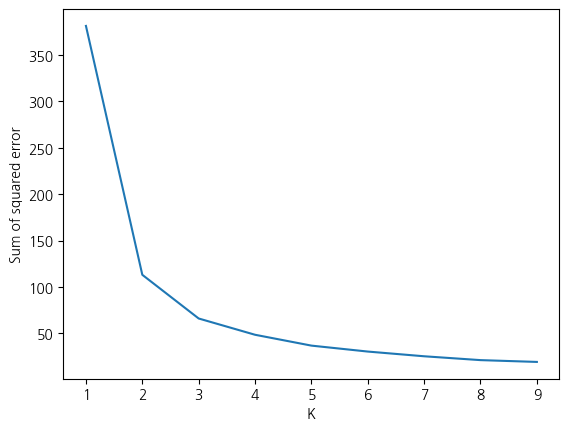

In [36]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)